In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import itertools
import pyarrow.parquet as pq
import pathlib

sys.path.append("..")
from utils.utils import df_stats, plot_features_all_cluster

In [2]:
path = pathlib.Path(
    "../../Extracted_Features_(CSV_files)/SHSY5Y_preprocessed_df_sc_norm.parquet"
)
df = pq.read_table(path).to_pandas()

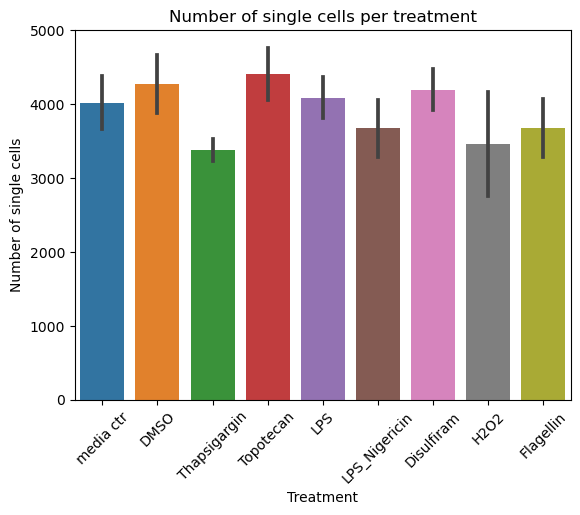

In [3]:
sns.barplot(
    x="Metadata_Treatment",
    y="Metadata_number_of_singlecells",
    data=df,
    estimator=np.mean,
    errorbar=("sd"),
)

plt.ylabel("Number of single cells")
plt.xlabel("Treatment")
plt.xticks(rotation=45)
plt.title("Number of single cells per treatment")

plt.savefig(
    "Figures/cell_counts_plate2/Number_of_single_cells_per_treatment.png",
    bbox_inches="tight",
)
plt.show()
plt.close()

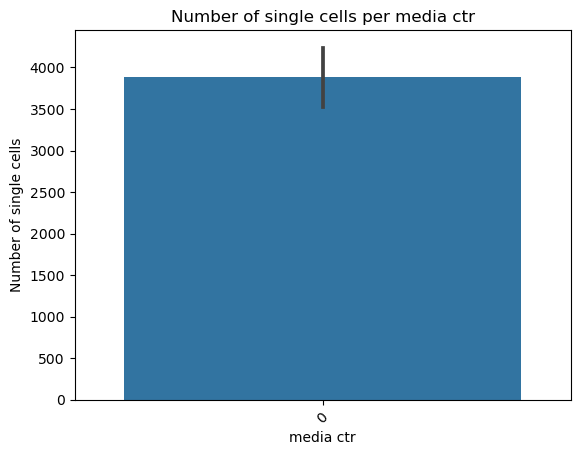

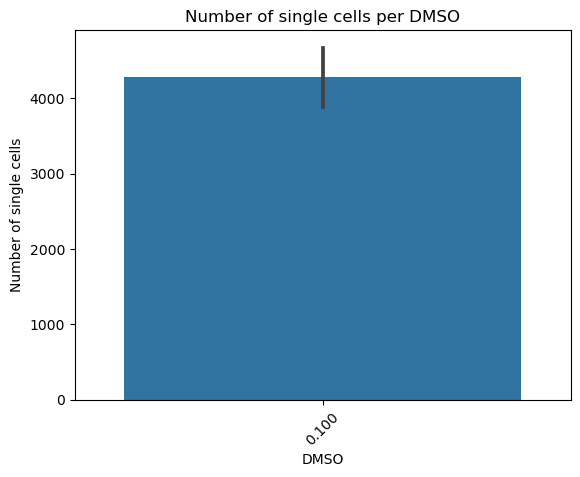

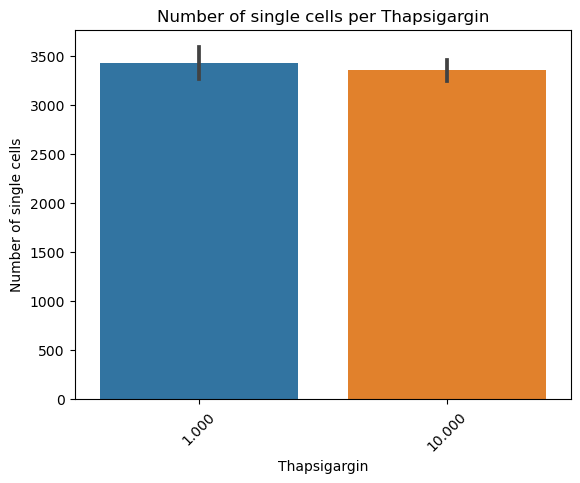

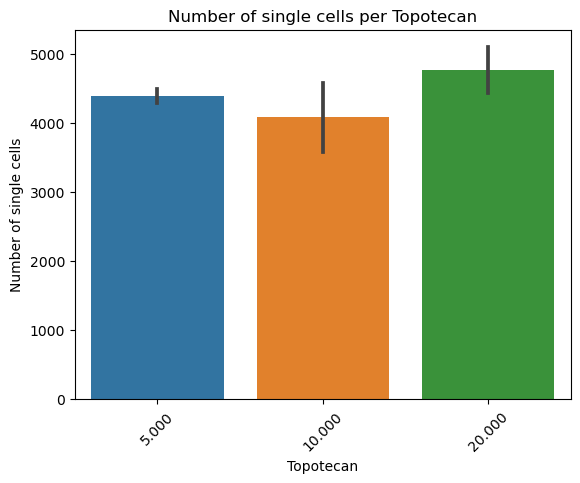

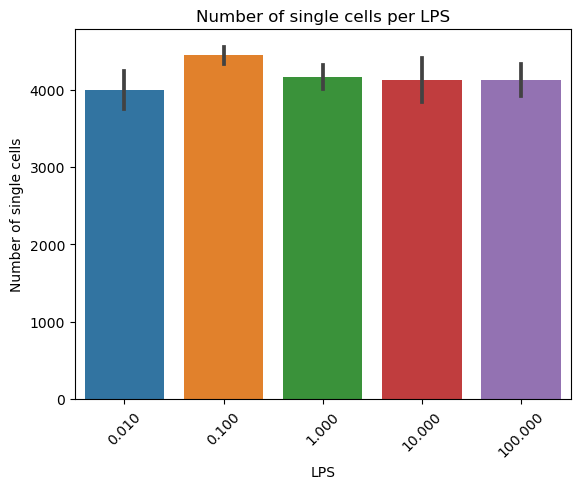

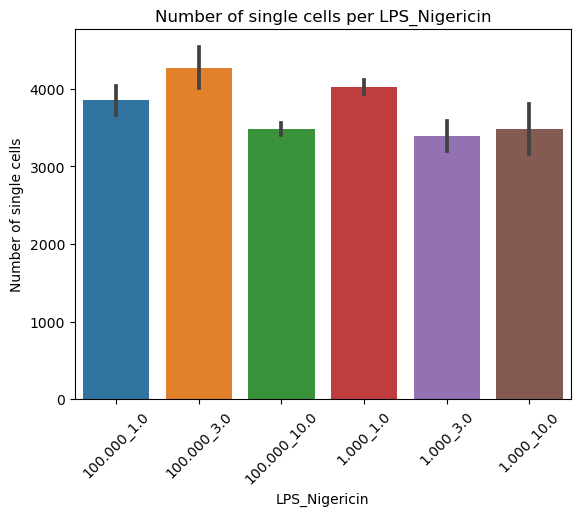

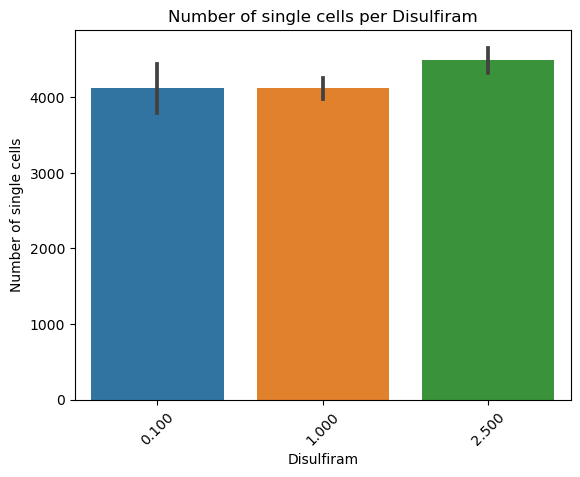

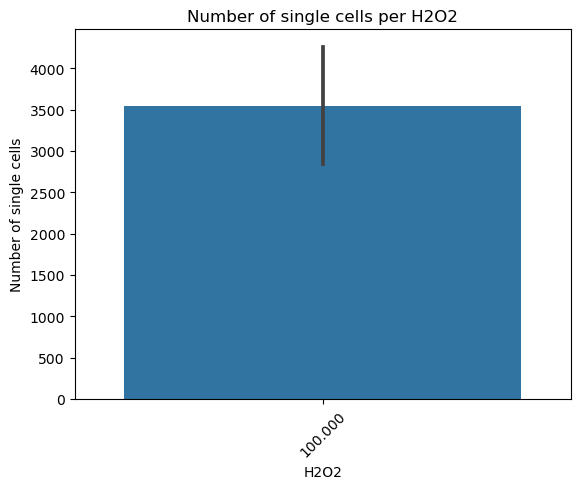

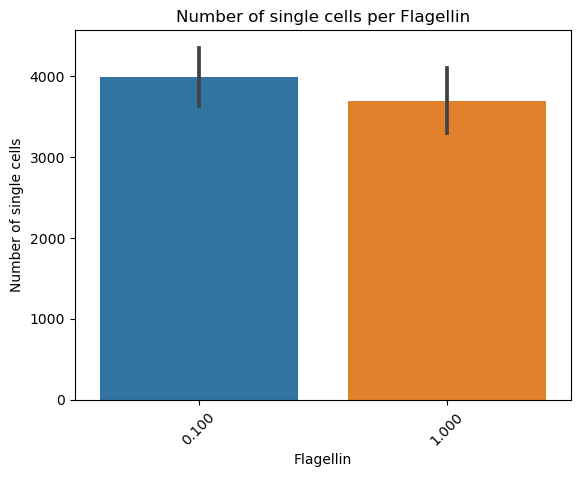

In [4]:
for i in df["Metadata_Treatment"].unique():
    tmp_df = df[df["Metadata_Treatment"] == i]
    sns.barplot(
        x="Metadata_Dose",
        y="Metadata_number_of_singlecells",
        # hue="Metadata_Treatment",
        estimator=np.median,
        data=tmp_df,
        errorbar=("sd"),
    )
    plt.xlabel(i)
    plt.ylabel("Number of single cells")
    plt.xticks(rotation=45)
    plt.title(f"Number of single cells per {i}")
    plt.savefig(
        f"Figures/cell_counts_plate2/Number_of_single_cells_per_{i}.png",
        bbox_inches="tight",
    )
    plt.show()
    plt.close()